### BUSINESS UNDERSTANDING
The airbnb dataset of boston contains data about AirBnB listings in the Boston city. this data set includes calendar listing and reviewss of all the listings by users. I am going to answer the following questions using this data set.

In [87]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import spacy
import afinn 
from afinn import Afinn
from math import floor

import pickle

import warnings
warnings.filterwarnings("ignore")

In [27]:
#Loading the data from  the provided Airbnb boston data set
calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')

In [28]:
#listing top five
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [29]:
#listing shapr
listings.shape

(3585, 95)

In [30]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [31]:
#calander top five
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [32]:
#calendar shape
calendar.shape

(1308890, 4)

In [33]:
#calendar shape
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [34]:
#reviews top five
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [35]:
reviews.shape

(68275, 6)

In [36]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [48]:
#Exploring - experiences_offered
print('Value counts for experiences_offered: ', listings['experiences_offered'].value_counts())


Value counts for experiences_offered:  none    3585
Name: experiences_offered, dtype: int64


In [50]:
#Exploring - host_unction
print('Value counts for host_location: ', listings['host_location'].value_counts())

Value counts for host_location:  Boston, Massachusetts, United States               2421
US                                                  521
New York, New York, United States                   113
Montreal, Quebec, Canada                             59
Middlesex County, Massachusetts, United States       50
Cambridge, Massachusetts, United States              42
Massachusetts, United States                         28
Spokane, Washington, United States                   25
Brookline, Massachusetts, United States              19
Somerville, Massachusetts, United States             17
Milton, Massachusetts, United States                 10
Medford, Massachusetts, United States                10
San Francisco, California, United States              7
Santa Monica, California, United States               6
Newton, Massachusetts, United States                  6
United States                                         6
Cohasset, Massachusetts, United States                6
Waltham, Massac

In [53]:
#exploring - review_value

print('Value counts for reviews_score: ', listings['review_scores_value'].value_counts())      

Value counts for reviews_score:  10.0    1177
9.0     1130
8.0      334
7.0       51
6.0       49
4.0       12
2.0        7
5.0        2
3.0        2
Name: review_scores_value, dtype: int64


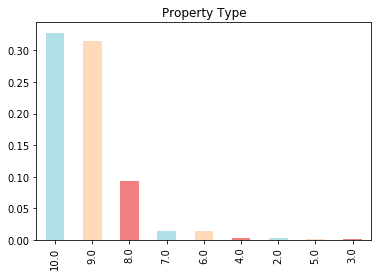

In [77]:
#plotting visualisation of the review_score
revi_vals = listings['review_scores_value'].value_counts()
(revi_vals/listings.shape[0]).plot(kind="bar", color=['powderblue', 'peachpuff', 'lightcoral'])
plt.title("Property Type");

<H6>ANALYSIS<H6>
    From the above graph we can determine that maximum number of the properties are very good as per the reviews provieded by the users

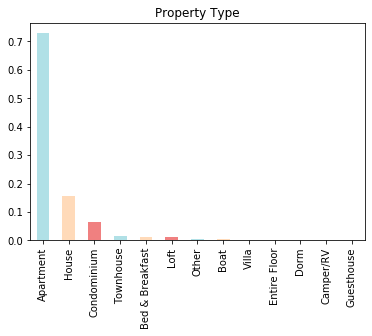

In [76]:
#property type and plotting visualisation
prop_vals = listings['property_type'].value_counts()
(prop_vals/listings.shape[0]).plot(kind="bar", color=['powderblue', 'peachpuff', 'lightcoral'])
plt.title("Property Type");

<H6>Analysis<H6>
    From the above bar graph we can see that in boston maximum number of properties are Apartment follower by house and condominium
               



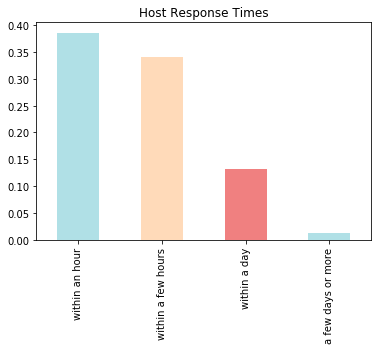

In [60]:
# explorinf - host_response_time and plotting visualisation
host_response_vals = listings['host_response_time'].value_counts()
(host_response_vals/listings.shape[0]).plot(kind="bar", color=['powderblue', 'peachpuff', 'lightcoral']);
plt.title("Host Response Times");


<H6>ANALYSIS<H6>
    The hosts response time is quite recommendable as per our analysis
    

In [79]:
#catergotising listing data in diifernt parts 
data_level=['property_type','room_type','bed_type','cancellation_policy']
[listings[c].value_counts() for c in data_level]

[Apartment          2612
 House               562
 Condominium         231
 Townhouse            54
 Bed & Breakfast      41
 Loft                 39
 Other                17
 Boat                 12
 Villa                 6
 Entire Floor          4
 Dorm                  2
 Camper/RV             1
 Guesthouse            1
 Name: property_type, dtype: int64,
 Entire home/apt    2127
 Private room       1378
 Shared room          80
 Name: room_type, dtype: int64,
 Real Bed         3453
 Futon              51
 Airbed             40
 Pull-out Sofa      31
 Couch              10
 Name: bed_type, dtype: int64,
 strict             1582
 flexible            999
 moderate            919
 super_strict_30      85
 Name: cancellation_policy, dtype: int64]

### Observations
    1. Entire room is he most popular type room_type.
    2. Each property has an average of 1.4 bedrooms
    3. There are total of 56 neighbourhood in boston.
    
    


In [84]:
#Showing columns with missing values
def show_missing_vals(df):
    """Description: This process is for listing  the missing values
     Arguments:
            vals: values"""
    missing_values = df.isnull().sum().sort_values(ascending = False)
    
    return missing_values.iloc[missing_values.nonzero()[0]]
show_missing_vals(listings)

C:\Users\Rahul\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_cleanliness        818
review_scores_communication      818
review_scores_rating             813
reviews_per_month                756
first_review                     756
last_review                      756
t

In [85]:
#Function for handling missing values
def handle_missing_remove(df):
    """handle_missing_remove funvtion is nasically definef for handelling the issing values obtained in the 
    previous column"""
    temp_df=df.copy()
    #Fill 0 in place of missing records for number of bedrooms,bathrooms,beds
    """There are a lot of fields which have only one level and not useful for analysis. Instead of dropping these fields,
    only a subset of fields is considered for calculating optimal price."""
    temp_df.beds.fillna(0,inplace=True)
    temp_df.bedrooms.fillna(0,inplace=True)
    temp_df.bathrooms.fillna(0,inplace=True)
    
    #Remove columns license and squarefeet which have more than 95% missing values
    temp_df.drop(['license','square_feet'],axis=1,inplace=True)
     
    return temp_df

In [86]:
listings = handle_missing_remove(listings)
show_missing_values(listings)

C:\Users\Rahul\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


neighbourhood_group_cleansed    3585
jurisdiction_names              3585
has_availability                3585
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_cleanliness        818
review_scores_communication      818
review_scores_rating             813
first_review                     756
last_review                      756
reviews_per_month                756
thumbnail_url                    599
xl_picture_url                   599
m

## Data Preprocessing 

In [89]:
#function to preprocess features
def preprocess(df):
    
    temp_df = df.copy()
    temp_df = temp_df.replace(
            {
            'host_has_profile_pic': {'t': True, 'f': False},
            'host_identity_verified': {'t': True, 'f': False},
            'instant_bookable': {'t': True, 'f': False},
            }
    )
        
    ## Recode property_type
    def recode_prop(value):
        if value not in ['House', 'Apartment','Condominium','Townhouse','Loft']:
            return 'other_prop_type'
        return value

    temp_df['property_type'] = temp_df['property_type'].apply(recode_prop)

    ## Recode bed_type
    def recode_bed(value):
        if value not in ['Real Bed']:
            return 'other_bed_type'
        return value

    temp_df['bed_type'] = temp_df['bed_type'].apply(recode_bed)
        
    #Calculate the bedroom and bathroom share per person. Higher the share, more the comfort.
    temp_df = temp_df.assign(
        bedroom_share = temp_df.bedrooms/temp_df.accommodates,
        bathroom_share = temp_df.bathrooms/temp_df.accommodates,
        
    )
    
    df=temp_df
    print("Pre-processing completed...")
    return df
listings=preprocess(listings)


Pre-processing completed...


In [92]:
#creating dummy columns by one hot encoding
def create_dummies(df, columns = ['room_type', 'property_type', 'bed_type', 'cancellation_policy']):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix = column)
        df = pd.concat([df,dummies], axis = 1)
    return df
listings = create_dummies(listings)


## Preprocess amenities

In [94]:
# Blank missing values
listings.loc[listings['amenities']=='{}','amenities']=""

In [96]:
#Removing the symbols and split the amenities with | as separator
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))
listings['amenities'].head()

0    TV|Wireless Internet|Kitchen|Free Parking on P...
1    TV|Internet|Wireless Internet|Air Conditioning...
2    TV|Cable TV|Wireless Internet|Air Conditioning...
3    TV|Internet|Wireless Internet|Air Conditioning...
4    Internet|Wireless Internet|Air Conditioning|Ki...
Name: amenities, dtype: object

In [97]:
#Take the unique list of amenities across all listings
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|")).values))
amenities

array(['', '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers',
       'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [98]:
#Map the presence or absence of amenities for each listing
amenities_matrix = np.array([listings['amenities'].map(lambda amns: amn in amns).values for amn in amenities])
amenities_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [99]:
amen=pd.DataFrame(data=amenities_matrix.T, columns=amenities)
amen.head()

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,True,False,False,False,False,False,False,False,True,False,...,True,False,False,True,True,False,False,True,False,False
1,True,False,True,False,False,False,True,False,True,False,...,True,False,False,True,True,False,False,True,False,False
2,True,False,True,False,False,True,True,False,False,False,...,True,False,False,True,True,False,False,True,True,True
3,True,False,True,True,False,False,True,False,False,False,...,True,False,False,True,True,False,False,True,False,False
4,True,False,True,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [100]:
#Concat the listing id to amen dataframe
listings_amenities = pd.concat([amen,listings['id']], axis=1)
listings_amenities.head()

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,id
0,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,True,False,False,12147973
1,True,False,True,False,False,False,True,False,True,False,...,False,False,True,True,False,False,True,False,False,3075044
2,True,False,True,False,False,True,True,False,False,False,...,False,False,True,True,False,False,True,True,True,6976
3,True,False,True,True,False,False,True,False,False,False,...,False,False,True,True,False,False,True,False,False,1436513
4,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,7651065


In [101]:
#Remove first column from listings_amenities whose name is ""
listings_amenities=listings_amenities.drop("",axis=1)
listings_amenities.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,id
0,False,False,False,False,False,False,False,True,False,True,...,False,False,True,True,False,False,True,False,False,12147973
1,False,True,False,False,False,True,False,True,False,True,...,False,False,True,True,False,False,True,False,False,3075044
2,False,True,False,False,True,True,False,False,False,True,...,False,False,True,True,False,False,True,True,True,6976
3,False,True,True,False,False,True,False,False,False,True,...,False,False,True,True,False,False,True,False,False,1436513
4,False,True,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,7651065


In [102]:
listings_amenities.columns

Index(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Free Parking on Street',
       'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub',
       'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen',
       'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)',
       'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50', 'id'],
      dtype='object')

## Creating dictionary to caractorizing amenities into meningful groups

In [104]:
#amenities that cannot be grouped are not taken into consideration
amenity_recode={
                'Air Conditioning':'Weather Control',
                'Indoor Fireplace':'Weather Control',
                'Heating':'Weather Control',
        
                'Carbon Monoxide Detector':'Safety Features',
                'Fire Extinguisher':'Safety Features',
                'First Aid Kit':'Safety Features',
                'Smoke Detector':'Safety Features',
                
                'Buzzer/Wireless Intercom':'Security Features',
                'Doorman':'Security Features',
                'Safety Card':'Security Features',
                'Lock on Bedroom Door':'Security Features',
                
                'Cat(s)':'Pet Friendly',
                'Dog(s)':'Pet Friendly',
                'Pets Allowed':'Pet Friendly',
                'Pets live on this property':'Pet Friendly',
                'Other pet(s)':'Pet Friendly',
                
                'Elevator in Building':'Access Friendly',
                'Wheelchair Accessible':'Access Friendly',
                
                'Essentials':'Essentials',
                'Hair Dryer':'Essentials',
                'Hangers':'Essentials',
                'Iron':'Essentials',
                'Shampoo':'Essentials',             
                
                'Cable TV':'TV',
                'TV':'TV',
                
                'Internet':'Internet',
                'Wireless Internet':'Internet',
                'Laptop Friendly Workspace':'Internet',
                
                'Dryer':'Laundry Facility',
                'Washer':'Laundry Facility',
                'Washer / Dryer':'Laundry Facility',
}

In [105]:
#Melt the amenities dataframe and recode from the dictionary
listings_amenities_melt = listings_amenities.melt(id_vars=['id'], var_name='amenity')

#Recoding and putting in new column called amenity_modified
listings_amenities_melt = listings_amenities_melt.assign(
    amenity_modified = listings_amenities_melt.amenity.replace(amenity_recode)
)

listings_amenities_melt.head()

,id,amenity,value,amenity_modified
0,12147973,24-Hour Check-in,False,24-Hour Check-in
1,3075044,24-Hour Check-in,False,24-Hour Check-in
2,6976,24-Hour Check-in,False,24-Hour Check-in
3,1436513,24-Hour Check-in,False,24-Hour Check-in
4,7651065,24-Hour Check-in,False,24-Hour Check-in


In [106]:
#Melt the amenities dataframe and recode from the dictionary
listings_amenities_melt = listings_amenities.melt(id_vars=['id'], var_name='amenity')

#Recoding and putting in new column called amenity_modified
listings_amenities_melt = listings_amenities_melt.assign(
    amenity_modified = listings_amenities_melt.amenity.replace(amenity_recode)
)

listings_amenities_melt.head()

,id,amenity,value,amenity_modified
0,12147973,24-Hour Check-in,False,24-Hour Check-in
1,3075044,24-Hour Check-in,False,24-Hour Check-in
2,6976,24-Hour Check-in,False,24-Hour Check-in
3,1436513,24-Hour Check-in,False,24-Hour Check-in
4,7651065,24-Hour Check-in,False,24-Hour Check-in


In [107]:
#Pivot the melted dataframe before merging with original dataframe
listings_amenities_pivot = listings_amenities_melt.pivot_table(
    index='id',
    columns='amenity_modified',
    values='value', 
    aggfunc='max'
)

listings_amenities_pivot.head()

amenity_modified,24-Hour Check-in,Access Friendly,Breakfast,Essentials,Family/Kid Friendly,Free Parking on Premises,Free Parking on Street,Gym,Hot Tub,Internet,...,Pet Friendly,Pool,Safety Features,Security Features,Smoking Allowed,Suitable for Events,TV,Weather Control,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id,,,,,,,,,,,,,,,,,,,,,
3353,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,True,True
5506,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
6695,True,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
6976,False,False,False,True,False,True,False,False,False,True,...,False,False,True,True,False,False,True,True,True,True
8792,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,True,False,False


In [108]:
#Join the amenities dataframe back to the original listings dataframe
listings_joined=listings.join(listings_amenities_pivot,on="id",how="inner")
listings_joined.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Pet Friendly,Pool,Safety Features,Security Features,Smoking Allowed,Suitable for Events,TV,Weather Control,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,True,False,True,False,False,False,True,True,False,False
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,True,False,True,True,False,False,True,True,False,False
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,False,False,True,True,False,False,True,True,True,True
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,False,False,True,True,False,False,True,True,False,False
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,False,False,True,False,False,False,False,True,False,False


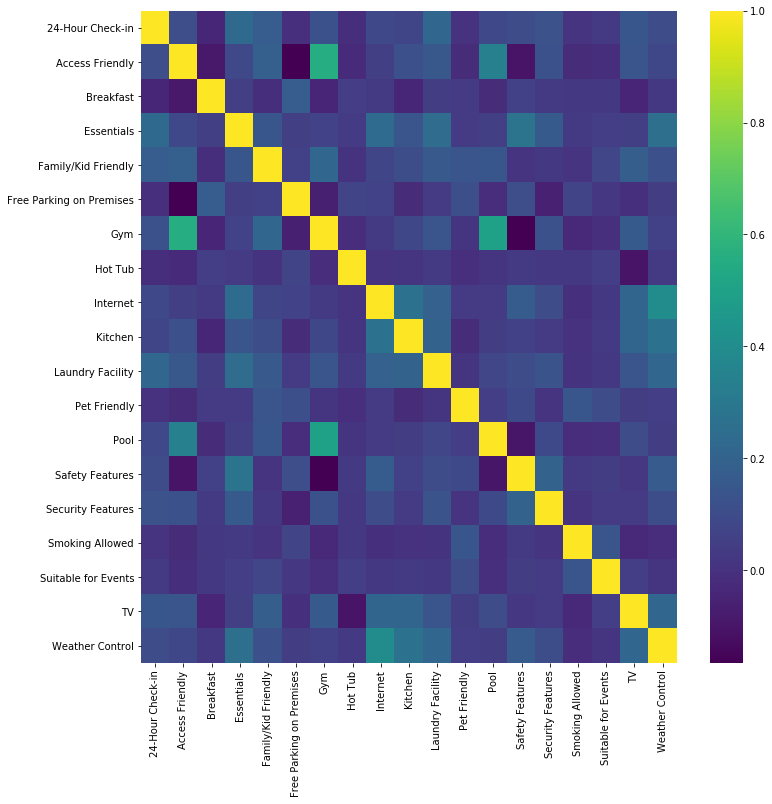

In [109]:
# Generating viridis heatmap to check the correlation among the amenities
listings_selected_amenities=listings_joined[['24-Hour Check-in', 'Access Friendly', 'Breakfast', 'Essentials',
       'Family/Kid Friendly', 'Free Parking on Premises', 'Gym', 'Hot Tub',
       'Internet', 'Kitchen', 'Laundry Facility', 'Pet Friendly', 'Pool',
       'Safety Features', 'Security Features', 'Smoking Allowed',
       'Suitable for Events', 'TV', 'Weather Control']]
fig = plt.figure(figsize= (12,12))
sns.heatmap(listings_selected_amenities.corr(), annot=False, vmax=1, cmap='viridis', square=False)

From the above heatmap we can say that no 2 amenities have high correlation among them.

### Detecting the pick season in boston

In [113]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

In [114]:
calendar['year'] = pd.DatetimeIndex(calendar['date']).year

In [118]:
#removing tthe $ sign and converting it into float 
calendar['price'] = calendar['price'].replace('[\$,]','', regex = True).astype(float)

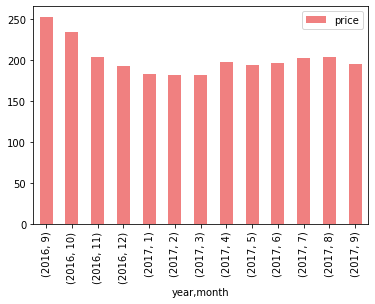

In [121]:
calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar", color=[ 'lightcoral']);

### OBSERVATION
  On the basis of above chart we can say that in boston August to november is the peak season, with September the highest. we can also analyse the the year starts slow as first three month have the lowest avg price

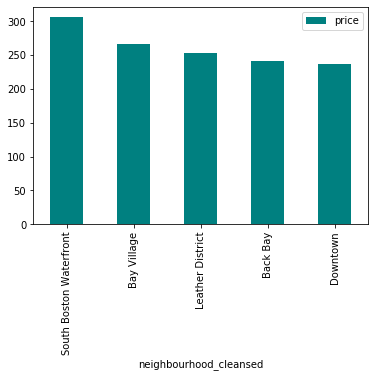

In [125]:
# Plot top 10 
top10_neigh = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar', color ='teal');


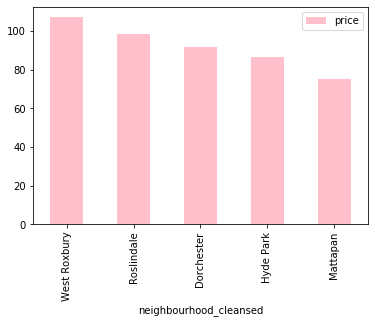

In [127]:
#plotting bottom 10 
bottom10_neigh = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar', color = 'pink');

### OBSERVATION
Based on the above analysis we can say that there is fluctuation in price on neighbourhoods. 
South boston waterfront seems to be the most expensive, Mattapan seems to be the cheapest

## What are the best places for properties related investments in boston city?

In [132]:
# analysing the data from the room_type

room_type_price = listings.groupby('room_type').price.mean()
room_type_price

room_type
Entire home/apt    227.436765
Private room        96.041364
Shared room         92.762500
Name: price, dtype: float64

Text(0.5, 0, 'Room type')

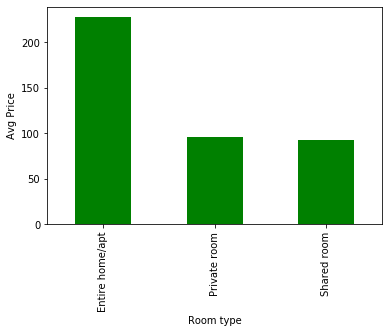

In [134]:
#visualising the relation between roomtype and price
room_type_price.plot(kind='bar', color ='green')
plt.ylabel('Avg Price')
plt.xlabel('Room type')

In [136]:
#neighbourhood data analysis of with average price and neighbourhood
per_neighbourhood_price = listings.groupby('neighbourhood_cleansed').price.mean()

In [137]:
per_neighbourhood_price

neighbourhood_cleansed
Allston                    112.307692
Back Bay                   240.950331
Bay Village                266.833333
Beacon Hill                224.443299
Brighton                   118.767568
Charlestown                198.045045
Chinatown                  232.352113
Dorchester                  91.639405
Downtown                   236.459302
East Boston                119.153333
Fenway                     220.393103
Hyde Park                   86.548387
Jamaica Plain              138.478134
Leather District           253.600000
Longwood Medical Area      138.444444
Mattapan                    75.125000
Mission Hill               121.967742
North End                  195.678322
Roslindale                  98.428571
Roxbury                    146.333333
South Boston               187.609195
South Boston Waterfront    306.060241
South End                  204.349693
West End                   209.591837
West Roxbury               107.108696
Name: price, dtype: float64

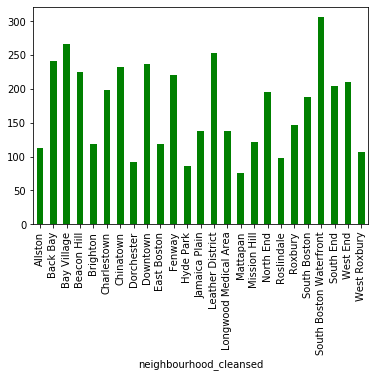

In [138]:
per_neighbourhood_price.plot(kind='bar', color='green')

In [139]:
#lsiting with respect to street
per_street_price = listings.groupby('street').price.mean()
per_street_price

street
, MA 02467, United States                                            71.500000
13th St, Charlestown, MA 02129, United States                       225.000000
13th Street, Boston, MA 02129, United States                        204.000000
1st Avenue, Boston, MA 02129, United States                         214.500000
1st Avenue, Charlestown, MA 02129, United States                    150.000000
8th Street, Charlestown, MA 02129, United States                   1000.000000
A Garden St, Boston, MA 02114, United States                        229.000000
A Mount Auburn Street, Cambridge, MA 02138, United States            85.000000
A St, Boston, MA 02210, United States                               170.000000
A Street, Boston, MA 02210, United States                           315.875000
Aberdeen Street, Boston, MA 02215, United States                     98.333333
Academy Hill Rd, Brighton, MA 02135, United States                   70.000000
Adair Road, Boston, MA 02135, United States  

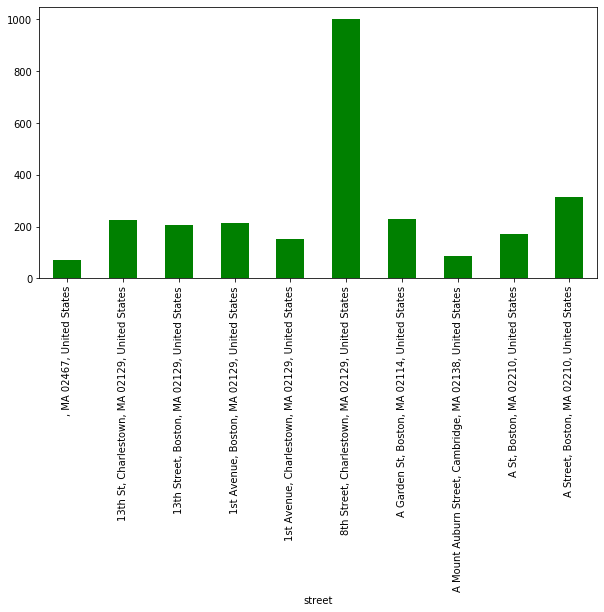

In [144]:
plt.figure(figsize=(10,5));
per_street_price[:10].plot(kind='bar', color = 'green');


### OBSERVATION
1. The average price of home or apartment is more as compare to other types like private rooms or shared rooms. Listing entire home or apartment will definately provide more revenue as compare to indivisual rooms in AirBnb.
2. As per the locaton is considered South boston waterfront folowed by back bay have more pricee as compare to other meighbourhoods. Takings first observation into consideration an entire home or apartment particularly i south boston can generate a very hefty revenue more than any other.

3. Some porch street in boston like Mrtle Street Boston Whraf road have very expensive listing So if you are looking for particular street they can generate a vry high revenue.
